Zad. 5


Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w teście Kołmogorowa i teście 𝜒
2 w przypadku weryfikacji zgodności z rozkładem 𝑡-
Studenta o różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu 𝑡-Studenta o 𝑘
stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝑡-Studenta o 𝑘 st. swobody. Należy
porównać wyniki klasycznego sposobu testowania i testowania z wykorzystaniem PIT (probability
integral transform). Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących
rozmiary testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import math

dfs = [i for i in range(1, 31, 5)] + [i for i in range(35, 101, 10)] + [200, 300, 500]
SampleSize = [i for i in range(10, 101, 20)]
results = []

mean = 0  
std_dev = 1  
simulations_number = 100  


Ustalenie stopni swobody, wielkości próbek danych. Średnia = 0, odchylenie standarowe = 1, ilość symulacji 100

In [2]:
for Sample in SampleSize:
    for df in dfs:
        chi2_counter = 0
        kologomorov_counter = 0
        pit_chi2_counter = 0
        pit_kologomorov_counter = 0

        bins = math.floor(Sample / 5)

        for i in range(simulations_number): 
            data = np.random.standard_t(df, size=Sample)
            pit_data = stats.t.cdf(data, df)
            bin_counts, bin_edges = np.histogram(pit_data, bins=bins)
            expected_counts = np.full(bins, Sample / bins)
            chi2_stat, p_val_chi2 = stats.chisquare(bin_counts, expected_counts)
            ks_stat, p_val_ks = stats.kstest(data, 't', args=(df,))
            pit_ks_stat, pit_p_val_ks = stats.kstest(pit_data, 'uniform')
            pit_chi2_stat, pit_p_val_chi2 = stats.chisquare(bin_counts, expected_counts)
            if(p_val_chi2 <= 0.05):
                chi2_counter = chi2_counter + 1
            if(p_val_ks <= 0.05):
                kologomorov_counter = kologomorov_counter + 1
            if(pit_p_val_ks <= 0.05):
                pit_kologomorov_counter = pit_kologomorov_counter + 1
            if(pit_p_val_chi2 <= 0.05):
                pit_chi2_counter = pit_chi2_counter + 1

        results.append([Sample, df, chi2_counter/100, pit_chi2_counter/100, kologomorov_counter/100, pit_kologomorov_counter/100])


In [3]:
df_results = pd.DataFrame(results, columns=["Sample size", "df", "Chi2", "PIT Chi2", "Kolmogorov", "PIT Kolmogorov"])


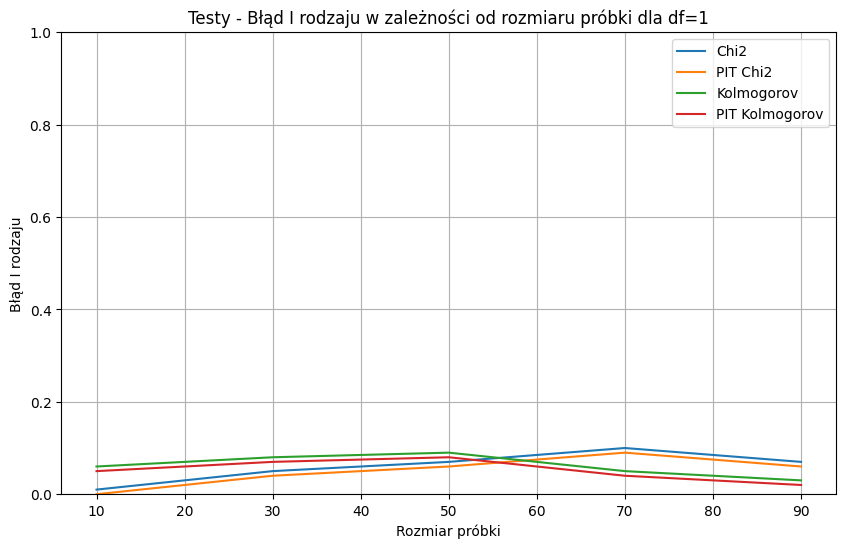

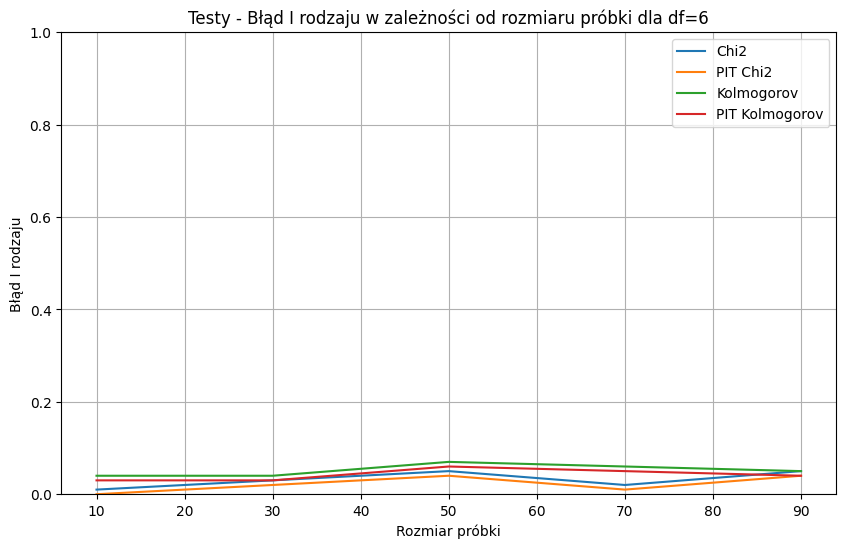

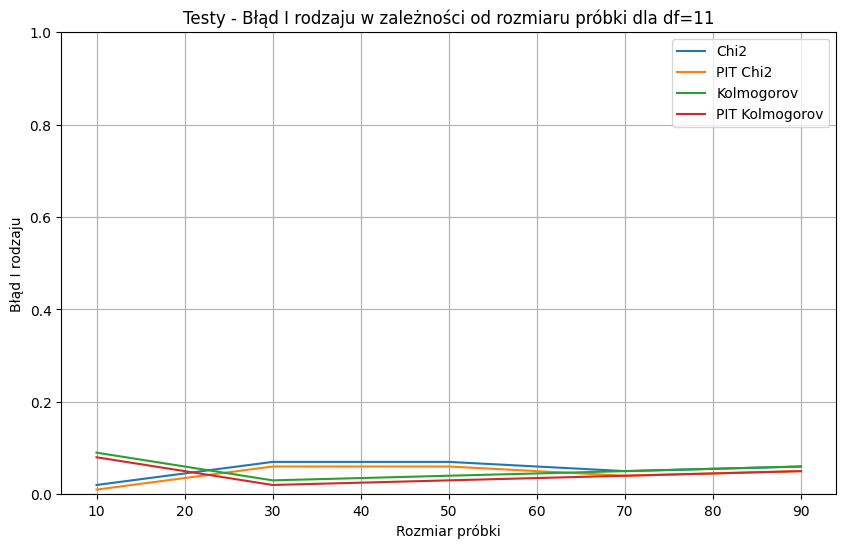

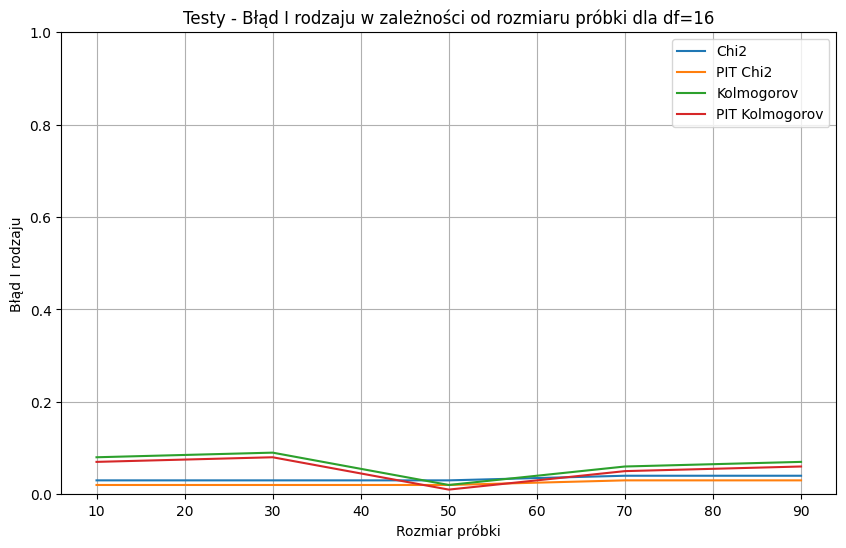

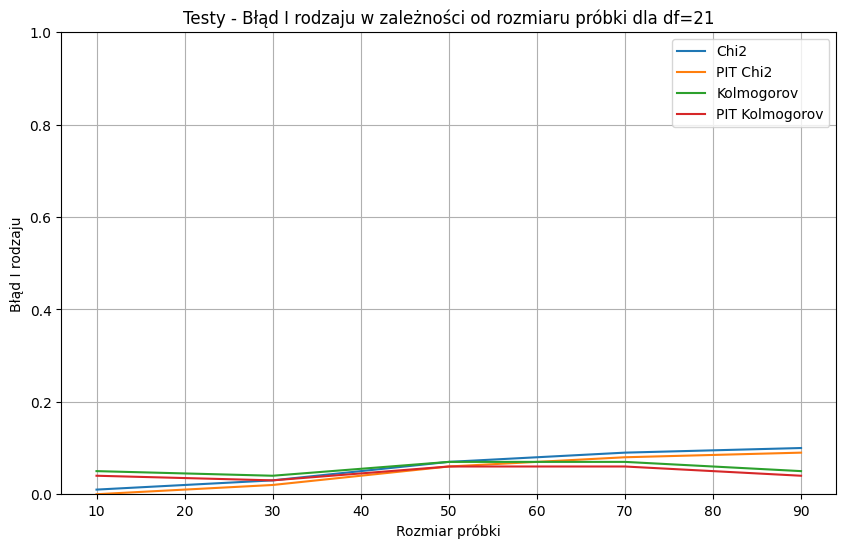

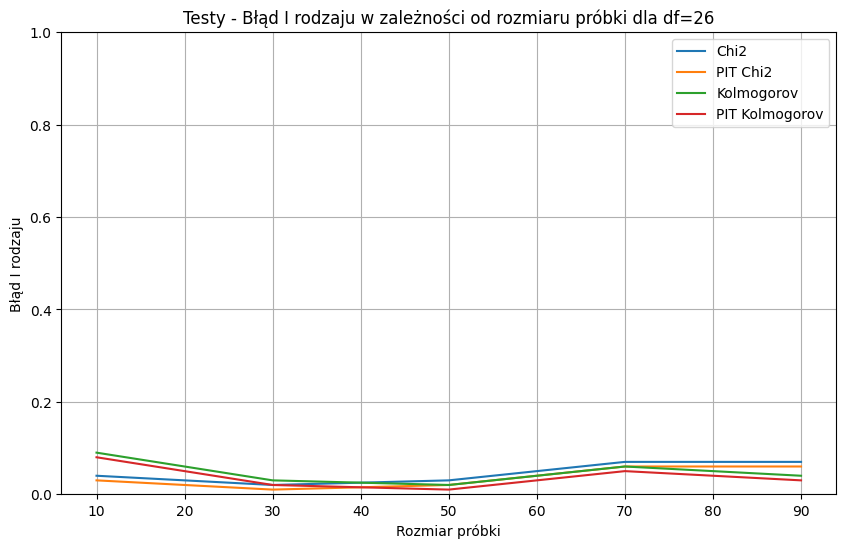

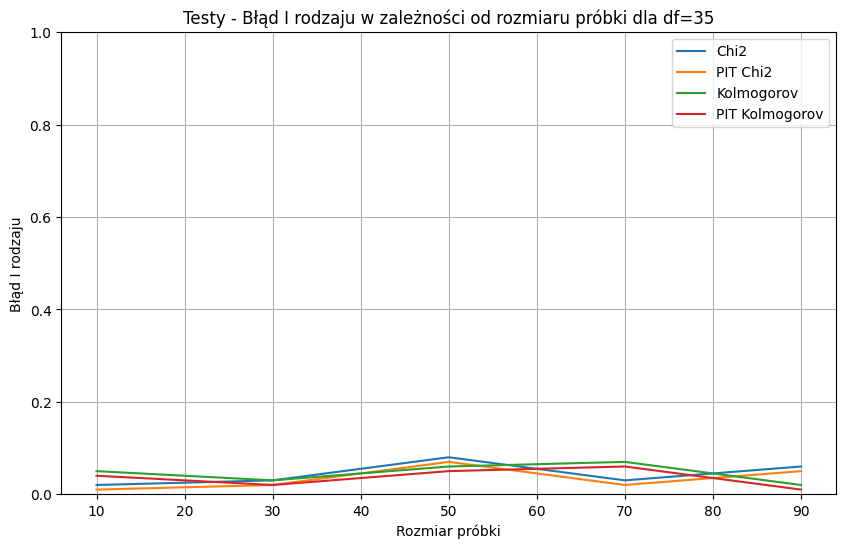

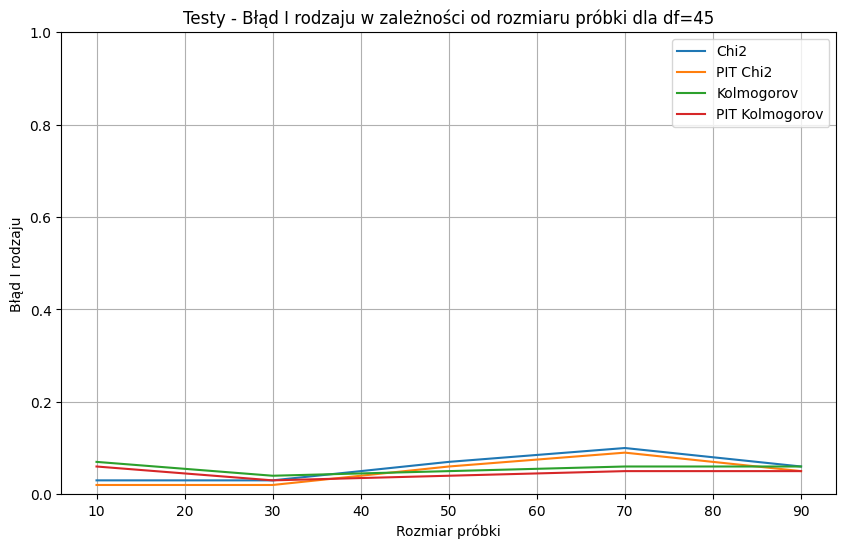

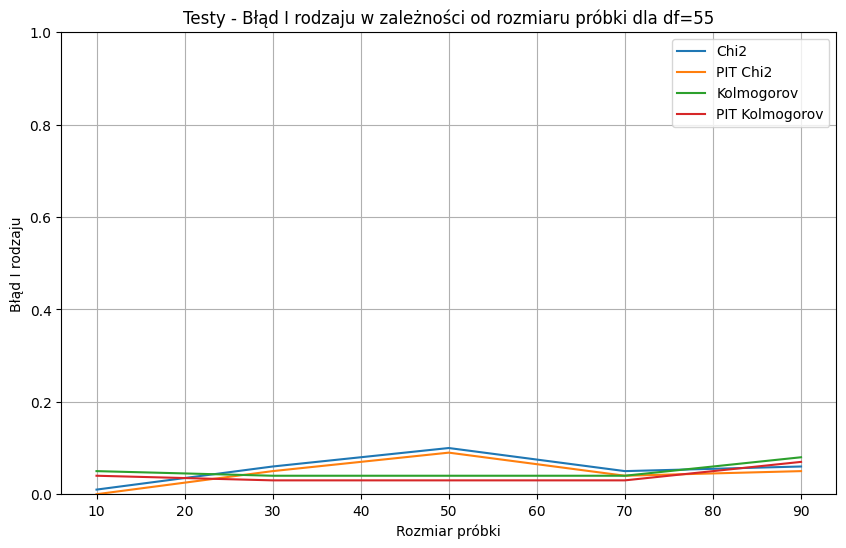

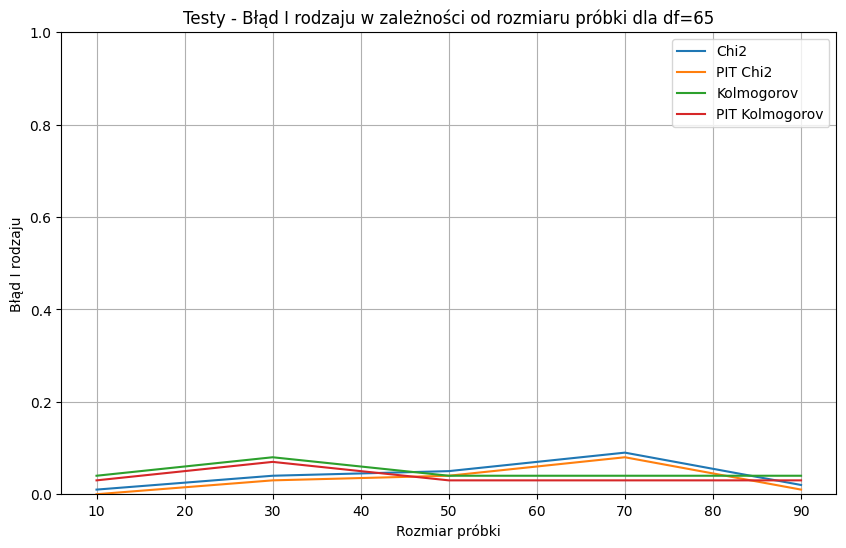

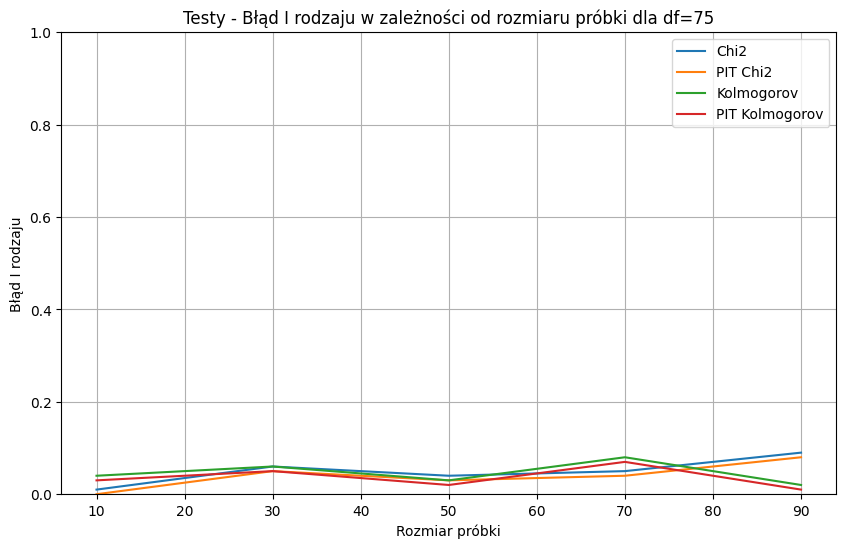

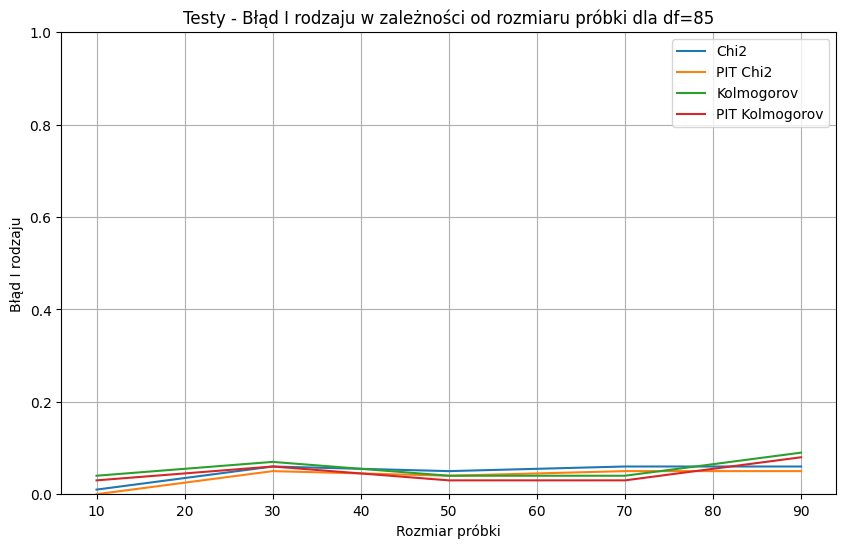

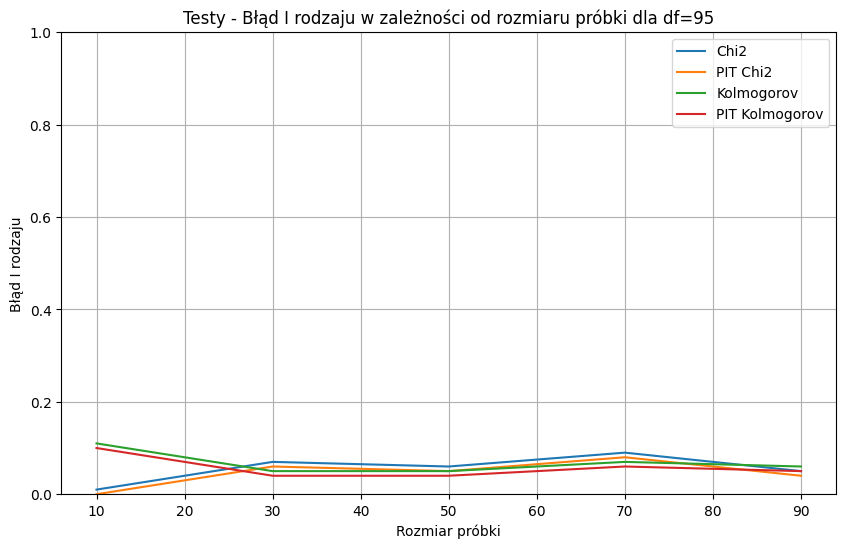

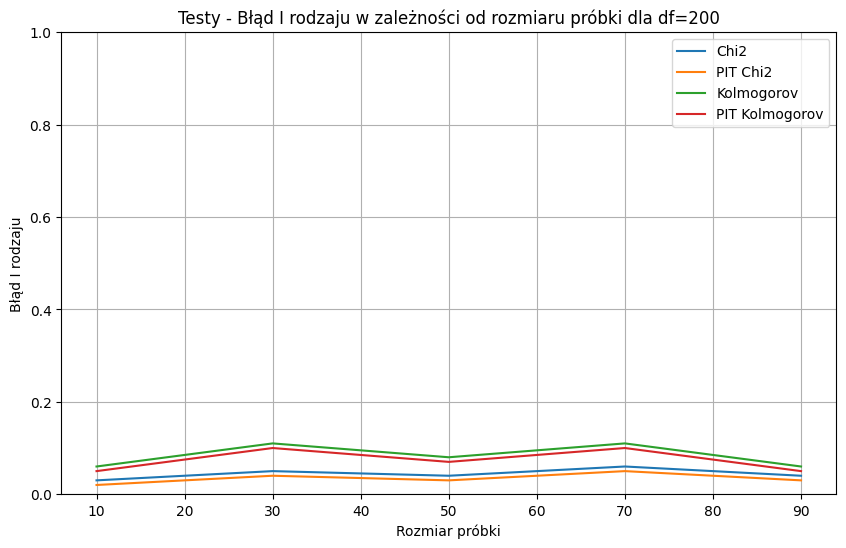

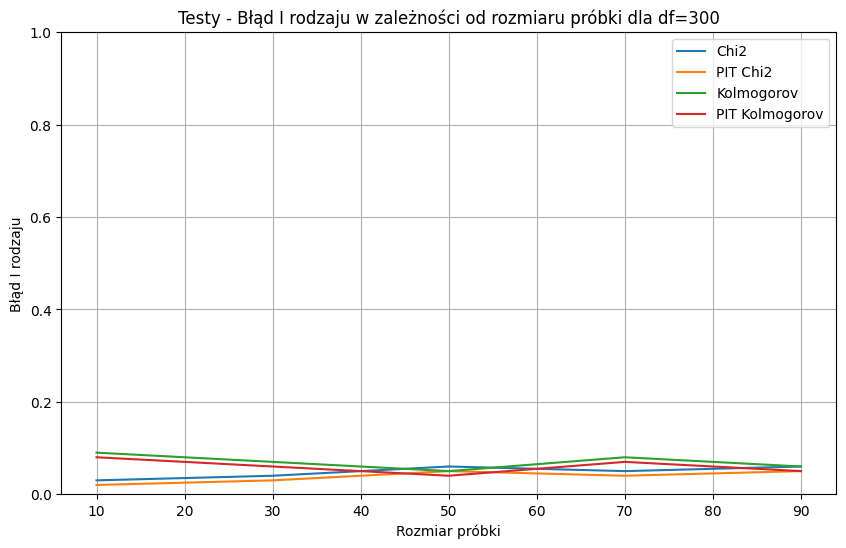

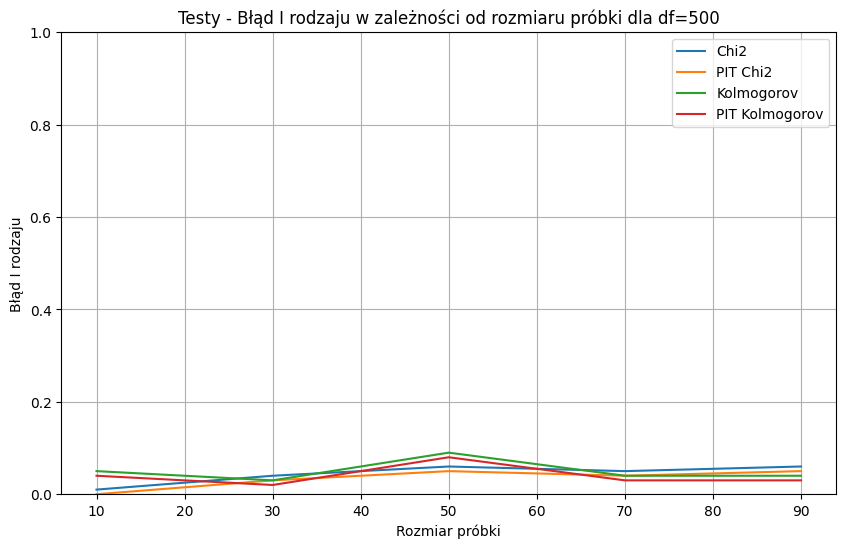

In [4]:
offset = 0.01  # Dodajemy niewielki offset

for df in dfs:
    plt.figure(figsize=(10, 6))
    df_selected = df_results[df_results["df"] == df]
    for test in ["Chi2", "PIT Chi2", "Kolmogorov", "PIT Kolmogorov"]:
        if test in ["Chi2", "Kolmogorov"]:
            plt.plot(df_selected["Sample size"], df_selected[test] + offset, label=test) 
        else:
            plt.plot(df_selected["Sample size"], df_selected[test], label=test)
    plt.title(f"Testy - Błąd I rodzaju w zależności od rozmiaru próbki dla df={df}")
    plt.xlabel("Rozmiar próbki")
    plt.ylabel("Błąd I rodzaju")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()


Błąd I rodzaju zgodnie z przewidywaniami utrzymuje się na poziomie 5%, w tych przypadkach nie ma znaczącej różnicy pomiędzy metodą PIT, a zwykłą. Dla niektórych stopni swobody błąd wraz z ilością próbek rośnie jednak nie jest to zjawisko, które rośnie wraz ze zwiększeniem stopni swobody.